<a href="https://colab.research.google.com/github/JackGallagher41/AI/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jack Gallagher

Artificial Intelligence

4/23/2024

## Problem: Determine if an asteroido is considered Hazardous or Non-Hazardous utilizing an MLPClassifier model




### Import all libraries needed:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from google.colab import drive

### Load up the data set:

In [3]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/AI/Copy of nasa_asteroid.csv')

Mounted at /content/drive


### Preparing the x, y, training, validation and testing for data set:

In [4]:
#drop all unimportant x values as well as hazardous which will represent the y
X = data.drop(['Close Approach Date','Epoch Date Close Approach', 'Name', 'Hazardous', 'Orbiting Body', 'Orbit Determination Date', 'Equinox'], axis=1)
y = data['Hazardous']

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=79, shuffle=True)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=79)


### MLPClassifier Preperation:

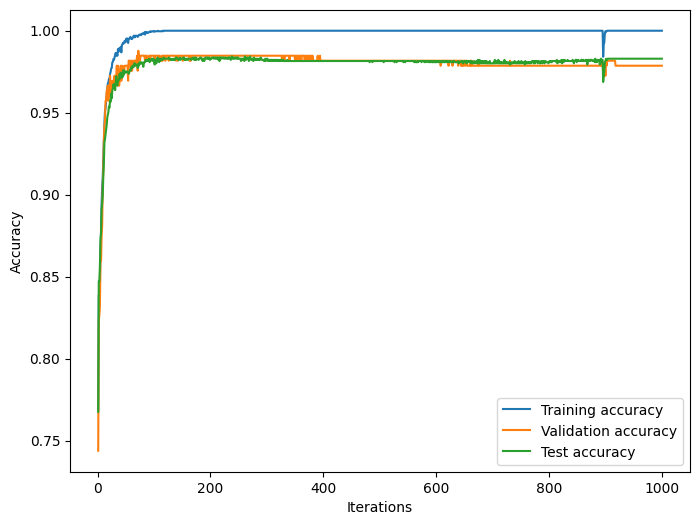

In [5]:
# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

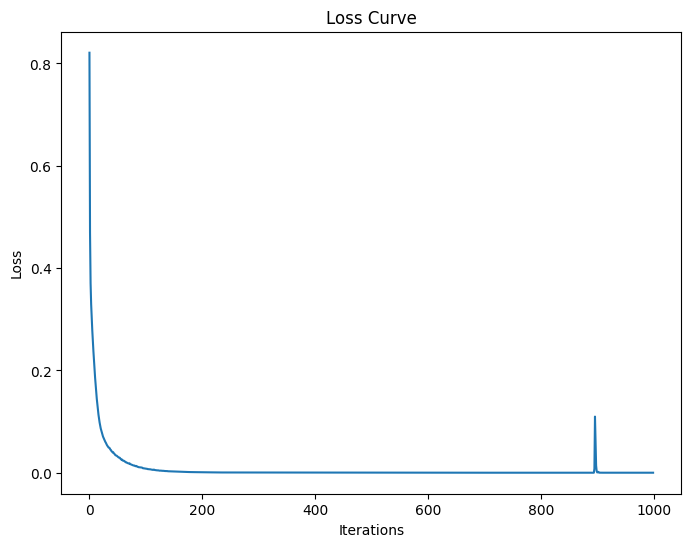

In [6]:
# Display loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

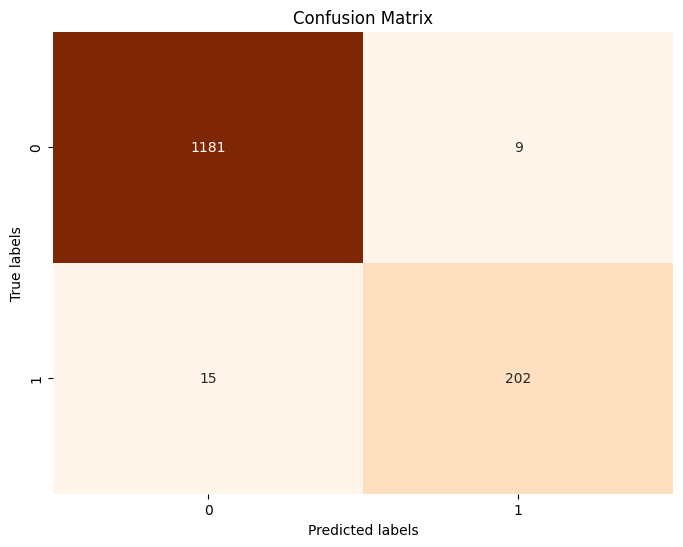

In [7]:
# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [8]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9829424307036247


### Try test with 3 hidden layers

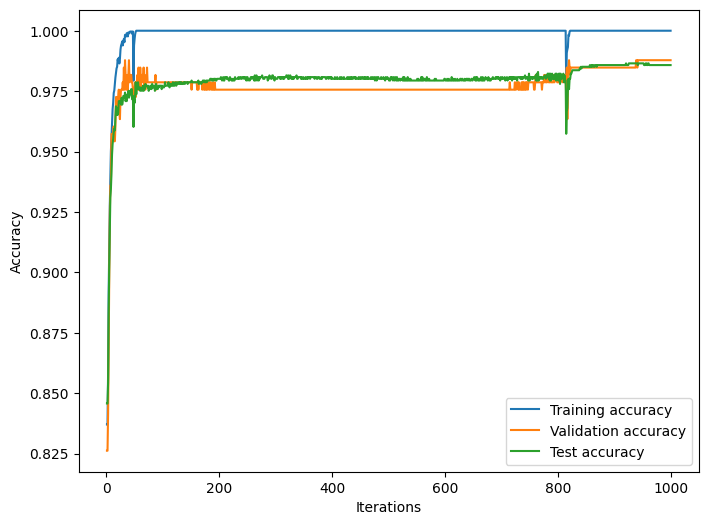

In [ ]:
# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

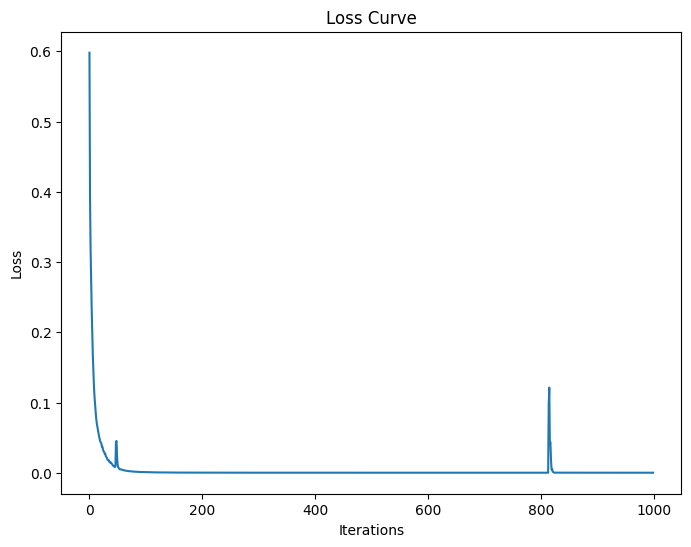

In [ ]:
# Display loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

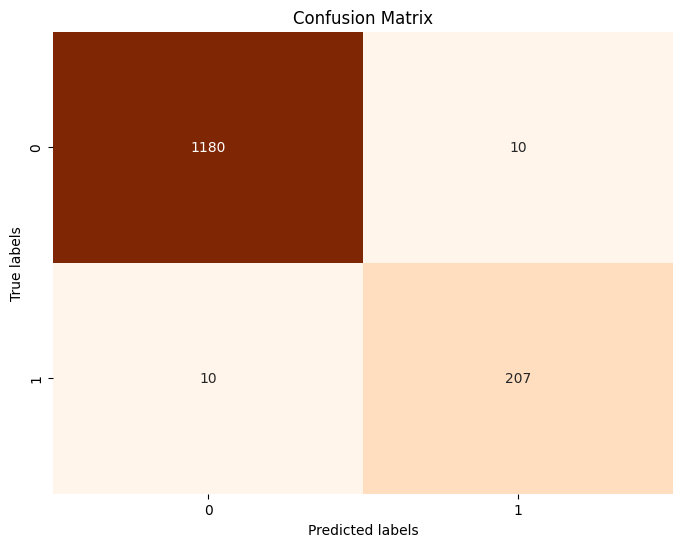

In [ ]:
# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9829424307036247


###Differing neuron sizes both increase:

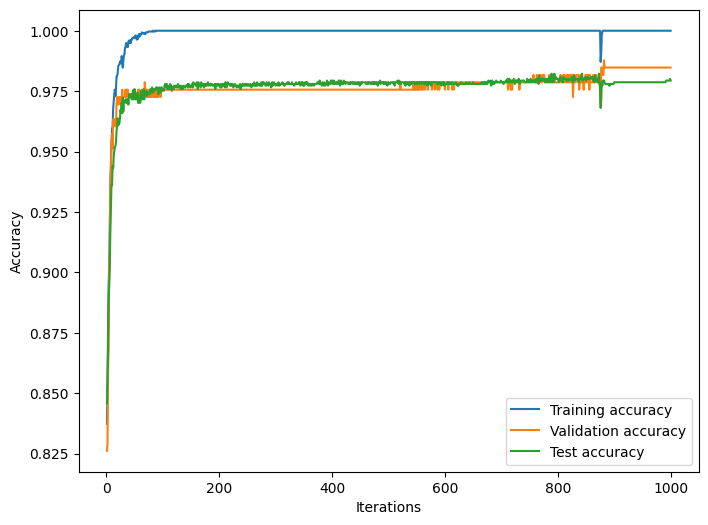

In [ ]:
# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(80,80), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

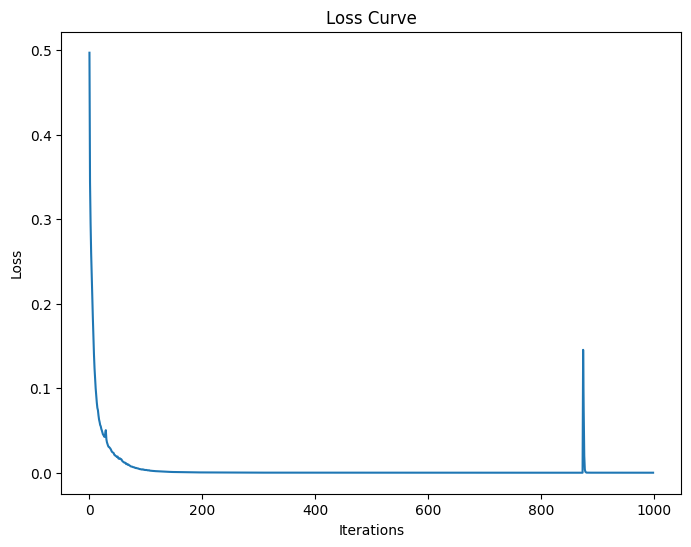

In [ ]:
# Display loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

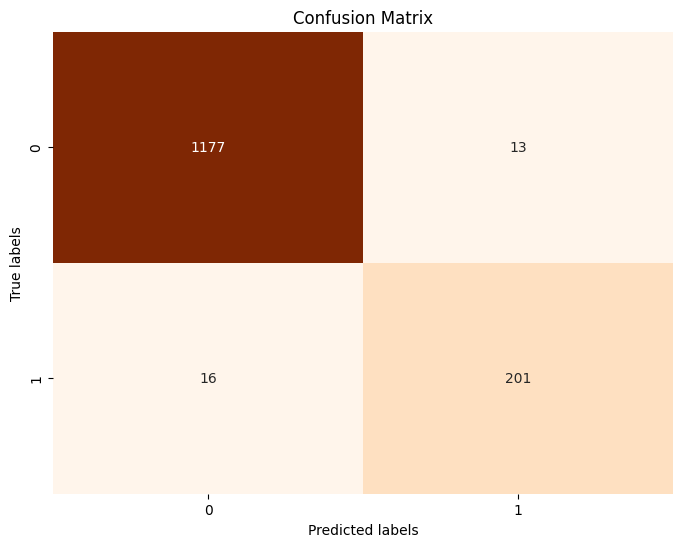

In [ ]:
# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9793887704335466


Decrease in both neurons:

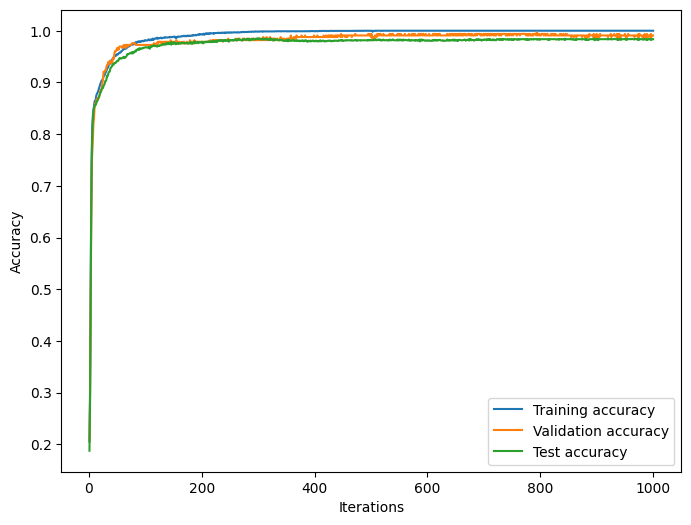

In [ ]:
# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

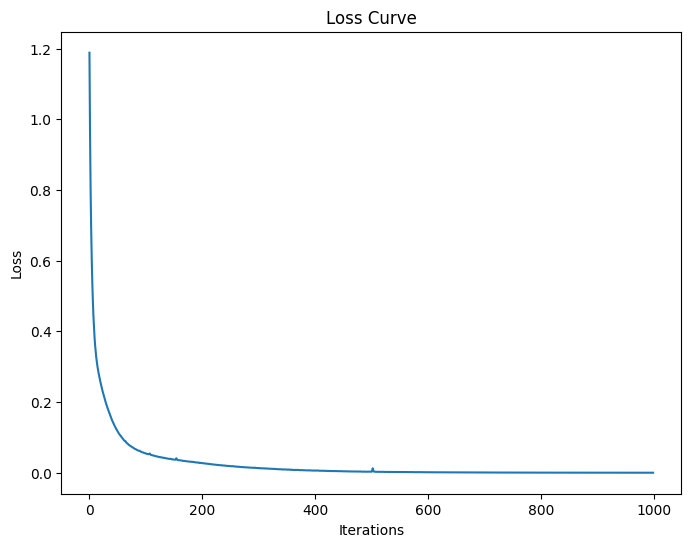

In [ ]:
# Display loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

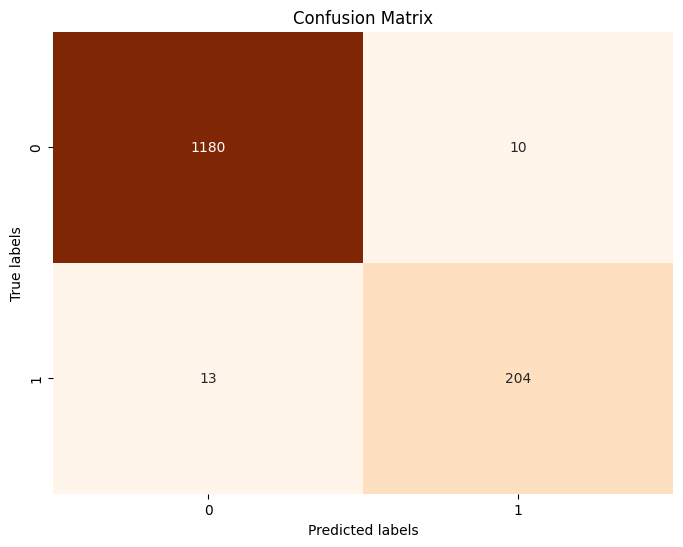

In [ ]:
# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9836531627576404


More Itterations:

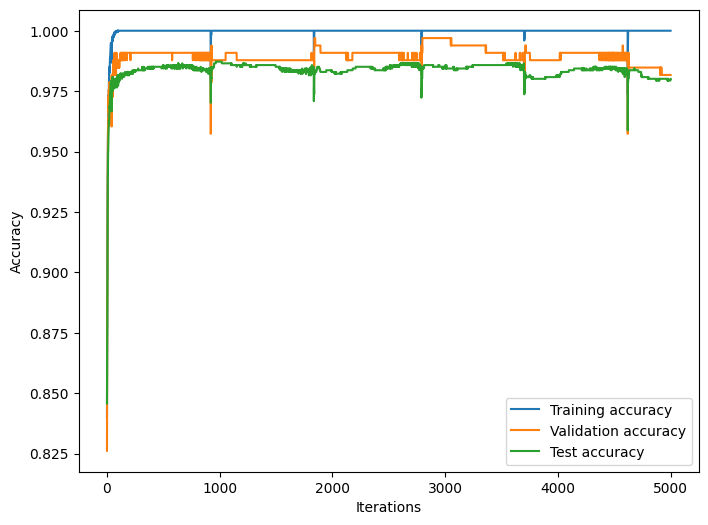

In [10]:
# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=5000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(5000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 5001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 5001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

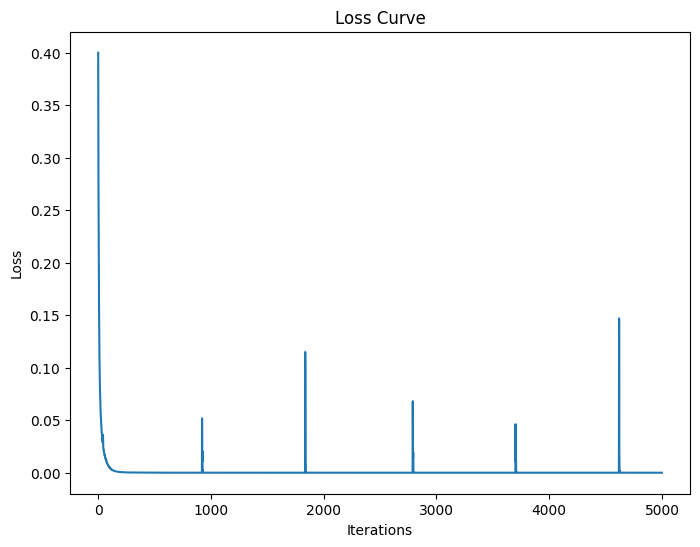

In [11]:
# Display loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

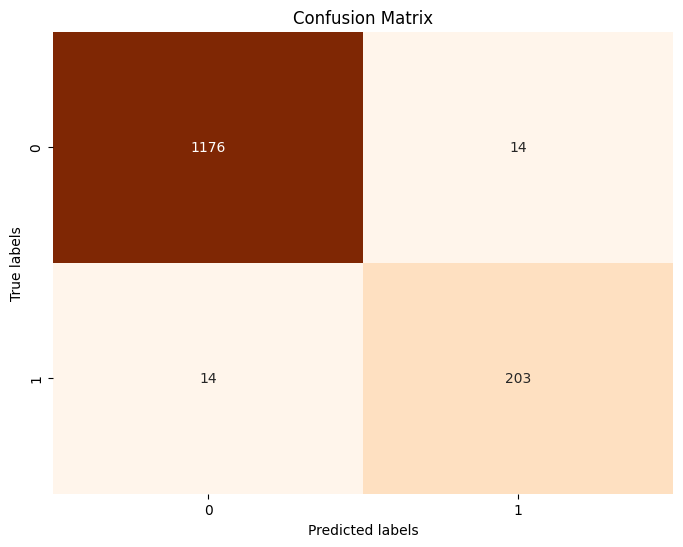

In [12]:
# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 1.0
Overall Test Accuracy: 0.9800995024875622


Less Itterations:

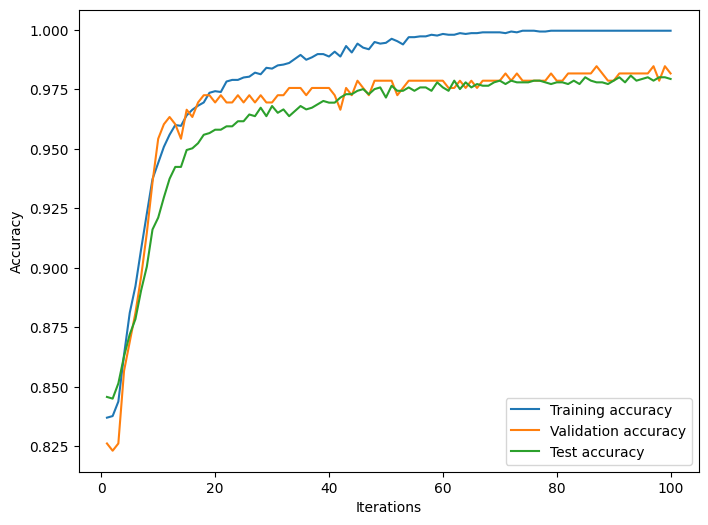

In [14]:
# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=100)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(100):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 101), train_accuracies, label='Training accuracy')
plt.plot(range(1, 101), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 101), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

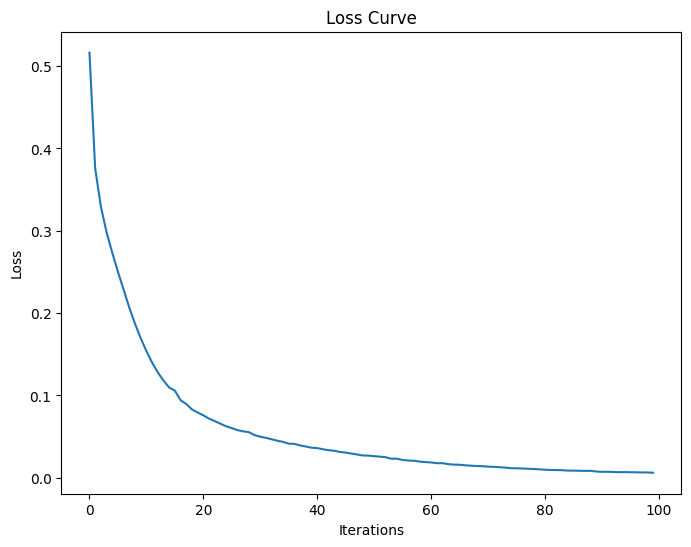

In [15]:
# Display loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

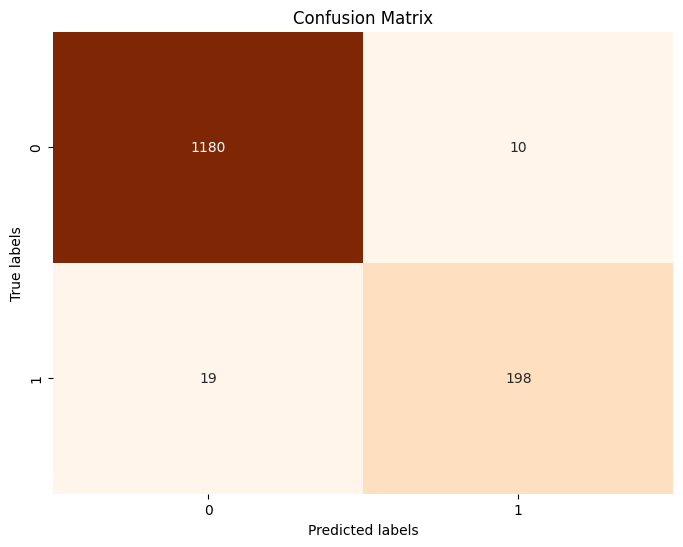

In [16]:
# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [17]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 0.9996612466124661
Overall Test Accuracy: 0.9793887704335466
